In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
stu_all = pd.read_excel('Study3.xlsx',sheet_name=2,header=1).dropna()

concept = pd.read_excel('Study3-full-profiles.xlsx',sheet_name=2)
concept = concept[['Usercode','Structure1','Delivery1','Visual1','CK1','Structure2','Delivery2','Visual2','CK2','CK Gain']]
concept = concept.dropna()

# Clean the empty value

stu = stu_all[stu_all.At_video != 0.0]

tutorials = stu[(stu['Aspect'] <=4.0)]
tut_info = tutorials[['Username','Video','Aspect','Text']]

examples = stu[(stu['Aspect'] >= 5.0)]
exp_info = examples[['Video','Aspect','Text']]


In [3]:
sort_con =concept.sort_values(by='CK Gain',ascending=False)

head = sort_con.head(3)

middle = sort_con[sort_con.CK1 == sort_con.CK2]
middle = middle.sample(n=3,random_state=1)

tail = sort_con.tail(3)

In [10]:
tail

Usercode  Structure1  Delivery1  Visual1   CK1  Structure2  Delivery2  \
27   cmc298         1.0        6.0      3.0  10.0         0.0        0.0   
16    bep29         6.0       13.0     11.0  30.0         5.0        8.0   
1    aco110         8.0       14.0     12.0  34.0         4.0        8.0   

    Visual2   CK2  CK Gain  
27      1.0   1.0     -9.0  
16      4.0  17.0    -13.0  
1       6.0  18.0    -16.0

In [4]:
frames = [head, middle, tail]
result = pd.concat(frames)

username = result['Usercode'].tolist()

c = stu.loc[stu['Username'].isin(username)]

# c['Username'].value_counts()
c

Username Participant CommentId      Video  Aspect  At_video  \
10     asc148          13      1608  Tutorial1     3.0      93.2   
11     asc148          13      1609  Tutorial1     2.0     165.7   
12     ash170          14       621  Tutorial1     4.0     147.7   
17      bep29          18       663  Tutorial1     4.0     162.6   
18      bep29          18       664  Tutorial1     4.0      51.9   
19      bep29          18       665  Tutorial1     4.0     152.5   
22      bmp62          21      1464  Tutorial1     2.0      32.9   
27     cmc298          29       822  Tutorial1     4.0      66.8   
172    asc148          13      1610  Tutorial2     4.0     137.0   
173    asc148          13      1611  Tutorial2     2.0     409.0   
178     bep29          18       666  Tutorial2     4.0       0.1   
179     bep29          18       667  Tutorial2     2.0      53.4   
180     bep29          18       668  Tutorial2     1.0     201.2   
181     bep29          18       669  Tutorial2     2.0     294.0   
182     bep29          18       670  Tutorial2     4.0     430.7   
185     bmp62          21      1463  Tutorial2     3.0     180.9   
215    jmc564          64      1210  Tutorial2     4.0     348.5   
257     oad28          97      1166  Tutorial2     4.0       1.9   
301     yca31         146      1618  Tutorial2     4.0     456.6   
305    aco110           3      1233  Tutorial3     4.0     276.8   
319    asc148          13      1612  Tutorial3     4.0     355.5   
322     bep29          18       769  Tutorial3     4.0      63.5   
323     bep29          18       770  Tutorial3     4.0     107.7   
324     bep29          18       771  Tutorial3     4.0     133.7   
325     bep29          18       772  Tutorial3     1.0     172.4   
326     bep29          18       773  Tutorial3     4.0     219.9   
327     bep29          18       774  Tutorial3     4.0     265.3   
328     bep29          18       775  Tutorial3     1.0     333.1   
333     bmp62          21      1465  Tutorial3     3.0     114.8   
370    jmc564          64      1211  Tutorial3     4.0     134.9   
...       ...         ...       ...        ...     ...       ...   
765     bep29          18       790   Example2     8.0      52.5   
766     bep29          18       791   Example2     6.0      91.1   
767     bep29          18       792   Example2     7.0     141.1   
768     bep29          18       793   Example2     5.0     156.9   
769     bep29          18       794   Example2     8.0     219.8   
770     bep29          18       795   Example2     6.0     285.8   
771     bep29          18       796   Example2     8.0     314.8   
772     bep29          18       797   Example2     5.0     368.3   
773     bep29          18       798   Example2     7.0     446.6   
774     bep29          18       799   Example2     7.0     463.4   
779     bmp62          21      1507   Example2     5.0     170.1   
867     yca31         146      1622   Example2     6.0     472.1   
869    aco110           3      1240   Example3     6.0     168.3   
892     bep29          18       800   Example3     5.0      40.2   
893     bep29          18       801   Example3     8.0      60.7   
894     bep29          18       802   Example3     7.0     128.5   
895     bep29          18       803   Example3     7.0     205.6   
896     bep29          18       804   Example3     5.0     320.5   
897     bep29          18       805   Example3     5.0     375.8   
902     bmp62          21      1511   Example3     6.0      62.9   
1007    yca31         146      1623   Example3     6.0     407.3   
1025    bep29          18       806   Example4     8.0      23.8   
1026    bep29          18       807   Example4     7.0      27.7   
1027    bep29          18       808   Example4     7.0     106.9   
1028    bep29          18       809   Example4     7.0     111.2   
1029    bep29          18       810   Example4     5.0     118.5   
1030    bep29          18       811   Example4     7.0     16

In [5]:
# head = 12  4 per person
# middle = 15 5 per person
# tail = 58 19.3 per person

c['Username'].value_counts()

bep29     52
asc148     7
yca31      7
bmp62      7
aco110     5
jmc564     3
oad28      2
cmc298     1
ash170     1
Name: Username, dtype: int64

# bar chart

In [6]:
x= [7,2,3,1,7,7,1,52,5]

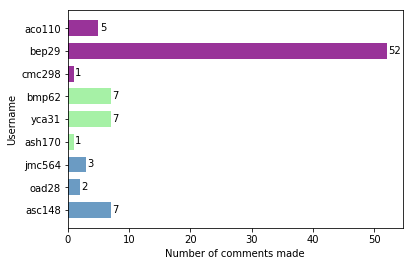

In [7]:
plt.barh(range(9), x, height=0.7, color=['steelblue','steelblue','steelblue','lightgreen','lightgreen','lightgreen','purple','purple','purple'], alpha=0.8)      # 从下往上画
plt.yticks(range(9), ['asc148','oad28','jmc564','ash170','yca31','bmp62','cmc298','bep29','aco110'])
plt.ylabel('Username')
for x, y in enumerate(x):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.xlabel('Number of comments made')
plt.show()


## Aspect selection

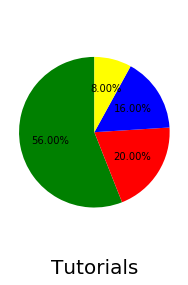

In [8]:
h = ['asc148','oad28','jmc564']
m = ['ash170','yca31','bmp62']
t = ['cmc298','bep29','aco110']

hh = tut_info.loc[tut_info['Username'].isin(h)]
sizeh = hh['Aspect'].value_counts().tolist()

mm = tut_info.loc[tut_info['Username'].isin(m)]
sizem = mm['Aspect'].value_counts().tolist()

tt = tut_info.loc[tut_info['Username'].isin(t)]
sizet = tt['Aspect'].value_counts().tolist()


plt.figure(figsize=(3,4.5)) #调节图形大小
colors = ['green','red','blue','yellow'] #每块颜色定义

patches,text1,text2 = plt.pie(sizet,
                      

                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.xlabel('Tutorials',fontsize=20)
plt.show()

In [9]:
tt

Username      Video  Aspect  \
17     bep29  Tutorial1     4.0   
18     bep29  Tutorial1     4.0   
19     bep29  Tutorial1     4.0   
27    cmc298  Tutorial1     4.0   
178    bep29  Tutorial2     4.0   
179    bep29  Tutorial2     2.0   
180    bep29  Tutorial2     1.0   
181    bep29  Tutorial2     2.0   
182    bep29  Tutorial2     4.0   
305   aco110  Tutorial3     4.0   
322    bep29  Tutorial3     4.0   
323    bep29  Tutorial3     4.0   
324    bep29  Tutorial3     4.0   
325    bep29  Tutorial3     1.0   
326    bep29  Tutorial3     4.0   
327    bep29  Tutorial3     4.0   
328    bep29  Tutorial3     1.0   
486   aco110  Tutorial4     3.0   
500    bep29  Tutorial4     1.0   
501    bep29  Tutorial4     3.0   
502    bep29  Tutorial4     2.0   
503    bep29  Tutorial4     4.0   
504    bep29  Tutorial4     4.0   
505    bep29  Tutorial4     1.0   
506    bep29  Tutorial4     2.0   

                                                  Text  
17    The power point presentation having one key idea  
18   There are other methods to presenting than jus...  
19       A good presentation takes effort and practice  
27   Focus more on the story being told, less on th...  
178  The start and end of the presentation is the m...  
179  Make the intro interesting - need to engage th...  
180                           Relate to topical events  
181                          Relate back to your point  
182  Potentially create close first and build up fr...  
305  ease up on the text on the slides- maybe just ...  
322            Use a headline to set a theme or a quip  
323  give audience a reason to listen. Pull in thei...  
324  Have clear boundaries within each topic, makes...  
325  Use words that motivate people and make you ap...  
326  Give statistics context and how it relates to ...  
327  Have one clear point per slide, very little te...  
328                      Rehearse to make it look good  
486                                    gotta sloooooow  
500        Firm stance, allows for balance and control  
501                         Use gestures to add impact  
502  Use a slow calm pace so people understand what...  
503  Add different tones to your presentation to ma...  
504  Have gaps between your sentences as it makes y...  
505  Hold eye contact as you would in a conversatio...  
506  Establish eye contact with all audience member...